## Pre-processing

### Cleaning

In [121]:
import matplotlib.pyplot as plt
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler
import collections

In [ ]:
# importing the data
ccba = pd.read_csv('data/public_train_x_ccba_full_hashed.csv')
cdtx = pd.read_csv('data/public_train_x_cdtx0001_full_hashed.csv')
cust_info = pd.read_csv('data/public_train_x_custinfo_full_hashed.csv')
dp = pd.read_csv('data/public_train_x_dp_full_hashed.csv')
remit = pd.read_csv('data/public_train_x_remit1_full_hashed.csv')
public_date = pd.read_csv('data/public_x_alert_date.csv')
train_date = pd.read_csv('data/train_x_alert_date.csv')
sample = pd.read_csv('data/sampleSubmission.csv')
answer_y = pd.read_csv('data/train_y_answer.csv')

In [ ]:
# save to pickle
ccba.to_pickle("data/ccba.pkl") 
cdtx.to_pickle("data/cdtx.pkl")
cust_info.to_pickle('data/cust_info.pkl')
dp.to_pickle('data/dp.pkl')
remit.to_pickle('data/remit.pkl')
public_date.to_pickle('data/public_date.pkl')
train_date.to_pickle('data/train_date.pkl')
sample.to_pickle('data/sample.pkl')
answer_y.to_pickle('data/answer_y.pkl')

In [122]:
## load as pickle files
ccba = pd.read_pickle("data/ccba.pkl") 
cdtx = pd.read_pickle("data/cdtx.pkl")
cust_info = pd.read_pickle('data/cust_info.pkl')
dp = pd.read_pickle('data/dp.pkl')
remit = pd.read_pickle('data/remit.pkl')
public_date = pd.read_pickle('data/public_date.pkl')
train_date = pd.read_pickle('data/train_date.pkl')
sample = pd.read_pickle('data/sample.pkl')
answer_y = pd.read_pickle('data/answer_y.pkl')

In [123]:
train_date.head()

,alert_key,date
0,171189,0
1,171202,0
2,171599,0
3,171737,0
4,171142,0


In [124]:
# combining the two dates CSVs in one
dates = pd.concat([public_date,train_date], axis=0)
dates.head()

,alert_key,date
0,352342,365
1,352866,365
2,352696,365
3,352330,365
4,352683,365


In [ ]:
# merging data (the only ones that have alert_key)

In [126]:
merge1 = cust_info.merge(dates, on='alert_key', how='left')
merge1

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE,date
0,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,7,365
1,352253,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,98177.0,2,365
2,352254,e5b0002791c7852644a2730abeaa893cdf14a072ef7812...,1,19.0,2052922.0,7,365
3,352280,74214c478dc6519fbefe4bc31693865bdcd698ab974b64...,3,15.0,201906.0,5,365
4,352282,0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...,1,12.0,7450.0,5,365
...,...,...,...,...,...,...,...
25746,352123,b600c0720096c241f5aec16b096c6a353492eee8a5855a...,1,17.0,12207.0,2,364
25747,352124,06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...,1,17.0,259985.0,4,364
25748,352125,0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...,3,19.0,928963.0,3,364
25749,352128,ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42...,3,19.0,21647.0,4,364


In [127]:
merge2 = merge1.merge(answer_y, on='alert_key', how='left')
merge2

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE,date,sar_flag
0,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,7,365,NaN
1,352253,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,98177.0,2,365,NaN
2,352254,e5b0002791c7852644a2730abeaa893cdf14a072ef7812...,1,19.0,2052922.0,7,365,NaN
3,352280,74214c478dc6519fbefe4bc31693865bdcd698ab974b64...,3,15.0,201906.0,5,365,NaN
4,352282,0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...,1,12.0,7450.0,5,365,NaN
...,...,...,...,...,...,...,...,...
25746,352123,b600c0720096c241f5aec16b096c6a353492eee8a5855a...,1,17.0,12207.0,2,364,0.0
25747,352124,06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...,1,17.0,259985.0,4,364,0.0
25748,352125,0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...,3,19.0,928963.0,3,364,0.0
25749,352128,ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42...,3,19.0,21647.0,4,364,0.0


In [128]:
# merging more attributes cdtx
merge2 = merge2.merge(cdtx, on='cust_id', how='left')

In [129]:
merge2 = merge2.drop_duplicates(subset=['alert_key','cust_id'])

In [130]:
merge2 = merge2.drop(['date_x','date_y'],axis=1)

In [10]:
merge2=merge2.drop_duplicates(subset=['alert_key','cust_id'])
merge2

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE,sar_flag,country,cur_type,amt
0,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,7,NaN,NaN,NaN,NaN
1,352253,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,98177.0,2,NaN,130.0,47.0,1110.0
9,352254,e5b0002791c7852644a2730abeaa893cdf14a072ef7812...,1,19.0,2052922.0,7,NaN,NaN,NaN,NaN
10,352280,74214c478dc6519fbefe4bc31693865bdcd698ab974b64...,3,15.0,201906.0,5,NaN,130.0,47.0,144559.0
34,352282,0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...,1,12.0,7450.0,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
13060691,352123,b600c0720096c241f5aec16b096c6a353492eee8a5855a...,1,17.0,12207.0,2,0.0,130.0,47.0,2601.0
13062781,352124,06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...,1,17.0,259985.0,4,0.0,130.0,47.0,122.0
13063910,352125,0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...,3,19.0,928963.0,3,0.0,NaN,NaN,NaN
13063911,352128,ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42...,3,19.0,21647.0,4,0.0,NaN,NaN,NaN


In [131]:
# merging more attributes ccba
merge2 = merge2.merge(ccba, on='cust_id', how='left')

In [132]:
merge2.columns

Index(['alert_key', 'cust_id', 'risk_rank', 'occupation_code', 'total_asset',
       'AGE', 'sar_flag', 'country', 'cur_type', 'amt', 'lupay', 'byymm',
       'cycam', 'usgam', 'clamt', 'csamt', 'inamt', 'cucsm', 'cucah'],
      dtype='object')

In [133]:
merge2 = merge2.drop(['AGE'],axis=1)

In [134]:
merge2 = merge2.drop_duplicates(subset=['alert_key','cust_id'])
merge2

,alert_key,cust_id,risk_rank,occupation_code,total_asset,sar_flag,country,cur_type,amt,lupay,byymm,cycam,usgam,clamt,csamt,inamt,cucsm,cucah
0,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,352253,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,98177.0,NaN,130.0,47.0,1110.0,2197.0,0.0,174655.0,-2156.0,0.0,0.0,0.0,-2178.0,0.0
14,352254,e5b0002791c7852644a2730abeaa893cdf14a072ef7812...,1,19.0,2052922.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,352280,74214c478dc6519fbefe4bc31693865bdcd698ab974b64...,3,15.0,201906.0,NaN,130.0,47.0,144559.0,4447.0,0.0,206512.0,210149.0,144559.0,-144559.0,0.0,2548.0,144559.0
28,352282,0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...,1,12.0,7450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237305,352123,b600c0720096c241f5aec16b096c6a353492eee8a5855a...,1,17.0,12207.0,0.0,130.0,47.0,2601.0,106235.0,0.0,50806.0,34073.0,0.0,0.0,4862.0,111651.0,0.0
237318,352124,06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...,1,17.0,259985.0,0.0,130.0,47.0,122.0,39067.0,0.0,124192.0,43634.0,0.0,0.0,13224.0,35982.0,0.0
237331,352125,0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...,3,19.0,928963.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237332,352128,ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42...,3,19.0,21647.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# getting the test and training data

In [172]:
# test data
test_data = merge2[merge2['sar_flag']!=0]
test_data = test_data[test_data['sar_flag']!=1]

In [173]:
test_data = test_data.drop_duplicates(subset='alert_key')
test_data

,alert_key,cust_id,risk_rank,occupation_code,total_asset,sar_flag,country,cur_type,amt,lupay,byymm,cycam,usgam,clamt,csamt,inamt,cucsm,cucah
0,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,352253,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,98177.0,NaN,130.0,47.0,1110.0,2197.0,0.0,174655.0,-2156.0,0.0,0.0,0.0,-2178.0,0.0
14,352254,e5b0002791c7852644a2730abeaa893cdf14a072ef7812...,1,19.0,2052922.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,352280,74214c478dc6519fbefe4bc31693865bdcd698ab974b64...,3,15.0,201906.0,NaN,130.0,47.0,144559.0,4447.0,0.0,206512.0,210149.0,144559.0,-144559.0,0.0,2548.0,144559.0
28,352282,0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...,1,12.0,7450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15813,365001,18ee644a371548e9780d701aaa7e0c8c42a7794cdee755...,1,17.0,135072.0,NaN,130.0,47.0,30.0,8516.0,0.0,313340.0,129708.0,0.0,0.0,0.0,0.0,0.0
15826,365004,7f69fa9eab8f397d367e2bb61ee1fa008999a0aab91e06...,3,12.0,2285386.0,NaN,130.0,47.0,20176.0,48199.0,0.0,100881.0,54141.0,0.0,0.0,19974.0,73772.0,0.0
15839,365008,12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...,3,19.0,1230244.0,NaN,130.0,47.0,390.0,0.0,61.0,120106.0,0.0,0.0,0.0,0.0,0.0,0.0
15850,365009,d24d46c19002ab1f9a02801af5e4be6a154b3c5adc0417...,1,17.0,162418.0,NaN,134.0,46.0,26200.0,34978.0,244.0,31322.0,6194.0,0.0,0.0,0.0,34585.0,0.0


In [174]:
# converting NaN to 0s in test data
test_data=test_data.fillna(0)
test_data

,alert_key,cust_id,risk_rank,occupation_code,total_asset,sar_flag,country,cur_type,amt,lupay,byymm,cycam,usgam,clamt,csamt,inamt,cucsm,cucah
0,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,352253,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,98177.0,0.0,130.0,47.0,1110.0,2197.0,0.0,174655.0,-2156.0,0.0,0.0,0.0,-2178.0,0.0
14,352254,e5b0002791c7852644a2730abeaa893cdf14a072ef7812...,1,19.0,2052922.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,352280,74214c478dc6519fbefe4bc31693865bdcd698ab974b64...,3,15.0,201906.0,0.0,130.0,47.0,144559.0,4447.0,0.0,206512.0,210149.0,144559.0,-144559.0,0.0,2548.0,144559.0
28,352282,0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...,1,12.0,7450.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15813,365001,18ee644a371548e9780d701aaa7e0c8c42a7794cdee755...,1,17.0,135072.0,0.0,130.0,47.0,30.0,8516.0,0.0,313340.0,129708.0,0.0,0.0,0.0,0.0,0.0
15826,365004,7f69fa9eab8f397d367e2bb61ee1fa008999a0aab91e06...,3,12.0,2285386.0,0.0,130.0,47.0,20176.0,48199.0,0.0,100881.0,54141.0,0.0,0.0,19974.0,73772.0,0.0
15839,365008,12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...,3,19.0,1230244.0,0.0,130.0,47.0,390.0,0.0,61.0,120106.0,0.0,0.0,0.0,0.0,0.0,0.0
15850,365009,d24d46c19002ab1f9a02801af5e4be6a154b3c5adc0417...,1,17.0,162418.0,0.0,134.0,46.0,26200.0,34978.0,244.0,31322.0,6194.0,0.0,0.0,0.0,34585.0,0.0


In [175]:
# training data
train_data=merge2.dropna(subset=['sar_flag'])
train_data=train_data.dropna()
train_data=train_data.drop_duplicates(subset='alert_key')
train_data

,alert_key,cust_id,risk_rank,occupation_code,total_asset,sar_flag,country,cur_type,amt,lupay,byymm,cycam,usgam,clamt,csamt,inamt,cucsm,cucah
15856,171142,a39fea9aec90969fe66a2b2b4d1b86368a2d38e8b8d4bf...,3,12.0,241719.0,0.0,130.0,47.0,1990.0,12565.0,0.0,150744.0,82748.0,0.0,0.0,12477.0,12477.0,0.0
15869,171152,7e42b5dca9b28ee8e5545beb834361e90e6197d176b389...,3,13.0,599497.0,0.0,130.0,47.0,1349.0,3581.0,0.0,324783.0,64363.0,0.0,0.0,0.0,4981.0,0.0
15883,171178,1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...,3,9.0,3634343.0,0.0,130.0,47.0,51583.0,829364.0,0.0,7666339.0,2343836.0,0.0,0.0,781279.0,781279.0,0.0
15896,171180,67f8cbb64dd3d447e992b1b299e0ceed3372188e47c88e...,1,17.0,4076287.0,0.0,130.0,47.0,410.0,636.0,0.0,256134.0,3538.0,0.0,0.0,0.0,3410.0,0.0
15909,171181,d253f77ce816406296362e15aa64888080acc551e9c596...,3,17.0,1827055.0,0.0,130.0,47.0,0.0,0.0,0.0,308771.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237279,352119,f00c77fb992022b1eb0236c21261661360b4a636c24e22...,1,13.0,40907.0,0.0,130.0,47.0,484.0,8498.0,0.0,61772.0,32042.0,0.0,0.0,3280.0,9566.0,0.0
237292,352120,823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...,1,17.0,114439.0,0.0,130.0,47.0,307.0,11215.0,0.0,80998.0,12277.0,0.0,0.0,0.0,12162.0,0.0
237305,352123,b600c0720096c241f5aec16b096c6a353492eee8a5855a...,1,17.0,12207.0,0.0,130.0,47.0,2601.0,106235.0,0.0,50806.0,34073.0,0.0,0.0,4862.0,111651.0,0.0
237318,352124,06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...,1,17.0,259985.0,0.0,130.0,47.0,122.0,39067.0,0.0,124192.0,43634.0,0.0,0.0,13224.0,35982.0,0.0


In [ ]:
# saving to pickle train/test
#merge2.to_pickle('data/all_merged.pkl')
#train_data.to_pickle('data/train_data.pkl')
#test_data.to_pickle('data/test_data.pkl')

In [176]:
# the data is really unbalanced 124/15189
train_data[train_data['sar_flag']==1.0]

,alert_key,cust_id,risk_rank,occupation_code,total_asset,sar_flag,country,cur_type,amt,lupay,byymm,cycam,usgam,clamt,csamt,inamt,cucsm,cucah
16586,171770,25cf26d9c40bb9f71292b809c4f92018b9bdfe3529c510...,1,17.0,1913895.0,1.0,130.0,47.0,814.0,11650.0,0.0,509326.0,24500.0,0.0,0.0,775.0,22940.0,0.0
17489,172480,7fde997da7e7a95280460889004bd2f23050bd8953de7e...,3,12.0,8251.0,1.0,130.0,47.0,307.0,30355.0,0.0,60710.0,5069.0,0.0,0.0,0.0,15918.0,0.0
19430,174298,bf19e3fe441d8dfa31794de3b4c318770ca7da5b4f5973...,1,19.0,186714.0,1.0,130.0,47.0,3730.0,76645.0,0.0,130031.0,74982.0,0.0,0.0,0.0,74982.0,0.0
24634,177788,6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...,1,15.0,1744729.0,1.0,130.0,47.0,104.0,13880.0,0.0,417806.0,6889.0,0.0,0.0,0.0,6889.0,0.0
24970,177960,26eeff4dcdbf9ddb3e2628f8710a1e87b1ea53d37e0331...,1,9.0,238193.0,1.0,93.0,50.0,65.0,31162.0,0.0,103320.0,96070.0,0.0,0.0,0.0,95047.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189455,312295,43b1b81d9c666b34cc6bd0c097d129f84ec5ca5714ed69...,1,12.0,1443936.0,1.0,130.0,47.0,3477.0,0.0,0.0,300640.0,121679.0,0.0,0.0,0.0,121679.0,0.0
191248,313558,123b9e193e4ebef652be6e48276b35a2981b66f8bfb2bb...,1,12.0,3555871.0,1.0,130.0,47.0,8280.0,1658007.0,0.0,620980.0,328444.0,0.0,0.0,115853.0,1395418.0,0.0
195140,316664,bcf5dc9d464a660377f39ffdf2388cc68859d04448c372...,2,13.0,3702179.0,1.0,130.0,47.0,3008.0,0.0,0.0,300836.0,78217.0,0.0,0.0,0.0,78217.0,0.0
230731,346021,9efb72c106f786e5a99a8c2b245864c831cf008dd2e9ee...,1,13.0,310.0,1.0,130.0,47.0,930.0,0.0,334.0,31027.0,16966.0,0.0,0.0,0.0,0.0,0.0


In [177]:
train_data[train_data['sar_flag']==0.0]

,alert_key,cust_id,risk_rank,occupation_code,total_asset,sar_flag,country,cur_type,amt,lupay,byymm,cycam,usgam,clamt,csamt,inamt,cucsm,cucah
15856,171142,a39fea9aec90969fe66a2b2b4d1b86368a2d38e8b8d4bf...,3,12.0,241719.0,0.0,130.0,47.0,1990.0,12565.0,0.0,150744.0,82748.0,0.0,0.0,12477.0,12477.0,0.0
15869,171152,7e42b5dca9b28ee8e5545beb834361e90e6197d176b389...,3,13.0,599497.0,0.0,130.0,47.0,1349.0,3581.0,0.0,324783.0,64363.0,0.0,0.0,0.0,4981.0,0.0
15883,171178,1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...,3,9.0,3634343.0,0.0,130.0,47.0,51583.0,829364.0,0.0,7666339.0,2343836.0,0.0,0.0,781279.0,781279.0,0.0
15896,171180,67f8cbb64dd3d447e992b1b299e0ceed3372188e47c88e...,1,17.0,4076287.0,0.0,130.0,47.0,410.0,636.0,0.0,256134.0,3538.0,0.0,0.0,0.0,3410.0,0.0
15909,171181,d253f77ce816406296362e15aa64888080acc551e9c596...,3,17.0,1827055.0,0.0,130.0,47.0,0.0,0.0,0.0,308771.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237279,352119,f00c77fb992022b1eb0236c21261661360b4a636c24e22...,1,13.0,40907.0,0.0,130.0,47.0,484.0,8498.0,0.0,61772.0,32042.0,0.0,0.0,3280.0,9566.0,0.0
237292,352120,823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...,1,17.0,114439.0,0.0,130.0,47.0,307.0,11215.0,0.0,80998.0,12277.0,0.0,0.0,0.0,12162.0,0.0
237305,352123,b600c0720096c241f5aec16b096c6a353492eee8a5855a...,1,17.0,12207.0,0.0,130.0,47.0,2601.0,106235.0,0.0,50806.0,34073.0,0.0,0.0,4862.0,111651.0,0.0
237318,352124,06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...,1,17.0,259985.0,0.0,130.0,47.0,122.0,39067.0,0.0,124192.0,43634.0,0.0,0.0,13224.0,35982.0,0.0


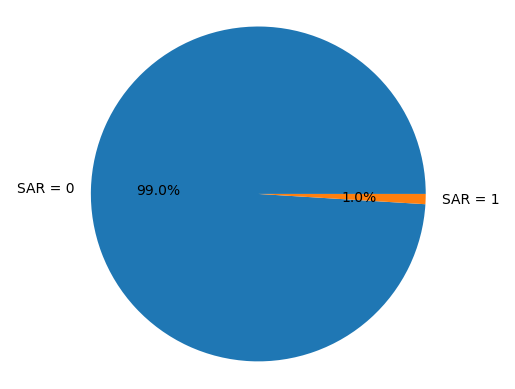

In [141]:
import matplotlib.pyplot as plt
# the amount of SAR = 1 and 0
fig,ax= plt.subplots(1,1)
ax.pie(merge2['sar_flag'].value_counts(), autopct='%1.1f%%',
      labels=['SAR = 0', 'SAR = 1'])
plt.axis('equal')
plt.ylabel('')
plt.show()

# finally everything is merge
try doing 4 test to see wich is the best method:
* 1) train with the raw data
* 2) train with oversamplig the 1s, undersampling the 0s
* 3) train with normalizing
* 4) train with normalizing and oversampling/undersampling

In [178]:
y_train = train_data['sar_flag'].values
X_train = train_data.drop(['alert_key','cust_id','sar_flag'],axis=1).values
X_test = test_data.drop(['alert_key','cust_id','sar_flag'],axis=1).values

In [ ]:
# saving to pickle
#pd.DataFrame(y_train).to_pickle('data/y_train.pkl')
#pd.DataFrame(X_train).to_pickle('data/X_train.pkl')
#pd.DataFrame(X_test).to_pickle('data/X_test.pkl')

In [179]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(15313, 15)
(1845, 15)
(15313,)


In [144]:
test_data.columns

Index(['alert_key', 'cust_id', 'risk_rank', 'occupation_code', 'total_asset',
       'sar_flag', 'country', 'cur_type', 'amt', 'lupay', 'byymm', 'cycam',
       'usgam', 'clamt', 'csamt', 'inamt', 'cucsm', 'cucah'],
      dtype='object')

### Normalizing

In [180]:
# Normalizing data with transactions in it 
# so far the standarscaler has worked better than SMOTE in my case
from sklearn.preprocessing import StandardScaler
train_data['cur_type'] = StandardScaler().fit_transform(train_data['cur_type'].values.reshape(-1,1))
train_data['amt'] = StandardScaler().fit_transform(train_data['amt'].values.reshape(-1,1))
train_data['lupay'] = StandardScaler().fit_transform(train_data['lupay'].values.reshape(-1,1))
train_data['byymm'] = StandardScaler().fit_transform(train_data['byymm'].values.reshape(-1,1))
train_data['cycam'] = StandardScaler().fit_transform(train_data['cycam'].values.reshape(-1,1))
train_data['usgam'] = StandardScaler().fit_transform(train_data['usgam'].values.reshape(-1,1))
train_data['clamt'] = StandardScaler().fit_transform(train_data['clamt'].values.reshape(-1,1))
train_data['csamt'] = StandardScaler().fit_transform(train_data['csamt'].values.reshape(-1,1))
train_data['inamt'] = StandardScaler().fit_transform(train_data['inamt'].values.reshape(-1,1))
train_data['cucsm'] = StandardScaler().fit_transform(train_data['cucsm'].values.reshape(-1,1))
train_data['cucah'] = StandardScaler().fit_transform(train_data['cucah'].values.reshape(-1,1))
train_data


,alert_key,cust_id,risk_rank,occupation_code,total_asset,sar_flag,country,cur_type,amt,lupay,byymm,cycam,usgam,clamt,csamt,inamt,cucsm,cucah
15856,171142,a39fea9aec90969fe66a2b2b4d1b86368a2d38e8b8d4bf...,3,12.0,241719.0,0.0,130.0,0.167921,-0.043567,-0.244325,-0.24174,-0.226899,-0.029421,-0.072154,0.018057,0.030969,-0.219126,-0.062948
15869,171152,7e42b5dca9b28ee8e5545beb834361e90e6197d176b389...,3,13.0,599497.0,0.0,130.0,0.167921,-0.045264,-0.249614,-0.24174,0.055369,-0.049179,-0.072154,0.018057,-0.083933,-0.223058,-0.062948
15883,171178,1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...,3,9.0,3634343.0,0.0,130.0,0.167921,0.087797,0.236540,-0.24174,11.962363,2.400492,-0.072154,0.018057,7.110977,0.184145,-0.062948
15896,171180,67f8cbb64dd3d447e992b1b299e0ceed3372188e47c88e...,1,17.0,4076287.0,0.0,130.0,0.167921,-0.047752,-0.251348,-0.24174,-0.055971,-0.114545,-0.072154,0.018057,-0.083933,-0.223882,-0.062948
15909,171181,d253f77ce816406296362e15aa64888080acc551e9c596...,3,17.0,1827055.0,0.0,130.0,0.167921,-0.048838,-0.251722,-0.24174,0.029399,-0.118347,-0.072154,0.018057,-0.083933,-0.225671,-0.062948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237279,352119,f00c77fb992022b1eb0236c21261661360b4a636c24e22...,1,13.0,40907.0,0.0,130.0,0.167921,-0.047556,-0.246719,-0.24174,-0.371199,-0.083913,-0.072154,0.018057,-0.053727,-0.220653,-0.062948
237292,352120,823fc5ce48cd827628ce0d1c574e6c3582cb772cf6173a...,1,17.0,114439.0,0.0,130.0,0.167921,-0.048025,-0.245120,-0.24174,-0.340017,-0.105154,-0.072154,0.018057,-0.083933,-0.219292,-0.062948
237305,352123,b600c0720096c241f5aec16b096c6a353492eee8a5855a...,1,17.0,12207.0,0.0,130.0,0.167921,-0.041948,-0.189180,-0.24174,-0.388984,-0.081730,-0.072154,0.018057,-0.039158,-0.167105,-0.062948
237318,352124,06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...,1,17.0,259985.0,0.0,130.0,0.167921,-0.048515,-0.228723,-0.24174,-0.269962,-0.071455,-0.072154,0.018057,0.037849,-0.206797,-0.062948


In [181]:
test_data['cur_type'] = StandardScaler().fit_transform(test_data['cur_type'].values.reshape(-1,1))
test_data['amt'] = StandardScaler().fit_transform(test_data['amt'].values.reshape(-1,1))
test_data['lupay'] = StandardScaler().fit_transform(test_data['lupay'].values.reshape(-1,1))
test_data['byymm'] = StandardScaler().fit_transform(test_data['byymm'].values.reshape(-1,1))
test_data['cycam'] = StandardScaler().fit_transform(test_data['cycam'].values.reshape(-1,1))
test_data['usgam'] = StandardScaler().fit_transform(test_data['usgam'].values.reshape(-1,1))
test_data['clamt'] = StandardScaler().fit_transform(test_data['clamt'].values.reshape(-1,1))
test_data['csamt'] = StandardScaler().fit_transform(test_data['csamt'].values.reshape(-1,1))
test_data['inamt'] = StandardScaler().fit_transform(test_data['inamt'].values.reshape(-1,1))
test_data['cucsm'] = StandardScaler().fit_transform(test_data['cucsm'].values.reshape(-1,1))
test_data['cucah'] = StandardScaler().fit_transform(test_data['cucah'].values.reshape(-1,1))
test_data

,alert_key,cust_id,risk_rank,occupation_code,total_asset,sar_flag,country,cur_type,amt,lupay,byymm,cycam,usgam,clamt,csamt,inamt,cucsm,cucah
0,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,0.0,0.0,-1.188948,-0.090219,-0.256316,-0.261483,-0.277239,-0.105077,-0.078899,0.074910,-0.064457,-0.250124,-0.078899
1,352253,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,98177.0,0.0,130.0,0.850851,-0.074491,-0.248860,-0.261483,-0.013051,-0.108575,-0.078899,0.074910,-0.064457,-0.257293,-0.078899
14,352254,e5b0002791c7852644a2730abeaa893cdf14a072ef7812...,1,19.0,2052922.0,0.0,0.0,-1.188948,-0.090219,-0.256316,-0.261483,-0.277239,-0.105077,-0.078899,0.074910,-0.064457,-0.250124,-0.078899
15,352280,74214c478dc6519fbefe4bc31693865bdcd698ab974b64...,3,15.0,201906.0,0.0,130.0,0.850851,1.958082,-0.241224,-0.261483,0.035137,0.235856,13.471910,-13.543206,-0.064457,-0.241738,13.471910
28,352282,0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...,1,12.0,7450.0,0.0,0.0,-1.188948,-0.090219,-0.256316,-0.261483,-0.277239,-0.105077,-0.078899,0.074910,-0.064457,-0.250124,-0.078899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15813,365001,18ee644a371548e9780d701aaa7e0c8c42a7794cdee755...,1,17.0,135072.0,0.0,130.0,0.850851,-0.089794,-0.227414,-0.261483,0.196729,0.105353,-0.078899,0.074910,-0.064457,-0.250124,-0.078899
15826,365004,7f69fa9eab8f397d367e2bb61ee1fa008999a0aab91e06...,3,12.0,2285386.0,0.0,130.0,0.850851,0.195661,-0.092735,-0.261483,-0.124643,-0.017242,-0.078899,0.074910,0.107544,-0.007322,-0.078899
15839,365008,12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...,3,19.0,1230244.0,0.0,130.0,0.850851,-0.084693,-0.256316,0.680412,-0.095563,-0.105077,-0.078899,0.074910,-0.064457,-0.250124,-0.078899
15850,365009,d24d46c19002ab1f9a02801af5e4be6a154b3c5adc0417...,1,17.0,162418.0,0.0,134.0,0.807451,0.281017,-0.137605,3.506097,-0.229861,-0.095028,-0.078899,0.074910,-0.064457,-0.136296,-0.078899


In [182]:
y_train = train_data['sar_flag'].values
X_train = train_data.drop(['alert_key','cust_id','sar_flag'],axis=1).values
X_test = test_data.drop(['alert_key','cust_id','sar_flag'],axis=1).values

### Oversampling

because of the problems created by the imbalanced data
we try oversampling and undersampling RandomOverSampler and SMOTE are two different ways to try it

In [ ]:
#https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

#!pip install imbalanced-learn

In [183]:
# Randomly over sample the minority class
ros = RandomOverSampler(random_state=42, sampling_strategy=0.5)
X_train_ros, y_train_ros= ros.fit_resample(X_train, y_train.ravel())
# Check the number of records after over sampling
#print(sorted(collections.Counter(y_train_ros).items()))

In [185]:
# saving to pickle
pd.DataFrame(y_train_ros).to_pickle('data/y_train_ros.pkl')
pd.DataFrame(X_train_ros).to_pickle('data/X_train_ros.pkl')
pd.DataFrame(X_test).to_pickle('data/X_test_ros.pkl')

In [41]:
# it can be done also with smote
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
sm = SMOTEENN(random_state = 42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))


Before OverSampling, counts of label '1': 124
Before OverSampling, counts of label '0': 15189 

After OverSampling, the shape of train_X: (28811, 15)
After OverSampling, the shape of train_y: (28811,) 

After OverSampling, counts of label '1': 14741
After OverSampling, counts of label '0': 14070


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

## Processing

In [186]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_ros, y_train_ros)

GaussianNB()

In [187]:
y_pred=nb.predict(X_test)
y_pred_prob=nb.predict_proba(X_test)
train_pred=nb.predict(X_train)

In [ ]:
#pred=pd.DataFrame(y_pred)
#pred.to_csv('data/pred.csv')

In [ ]:
#alert_key = test_data['alert_key']
#alert_key.to_csv('data/alert_key.csv')

In [188]:
pred=pd.DataFrame(y_pred).value_counts()
pred

0.0    1845
dtype: int64

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [ ]:
### Logistic Regression

In [189]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C = 0.01, penalty = 'l2', max_iter=1500)
lr.fit(X_train_ros, y_train_ros)

LogisticRegression(C=0.01, max_iter=1500)

In [190]:
y_pred=lr.predict(X_test)
y_pred_prob=lr.predict_proba(X_test)
train_pred=lr.predict(X_train_res)

In [191]:
pred=pd.DataFrame(y_pred)
pred.value_counts()

0.0    1845
dtype: int64

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
# build DecisionTree model

DT_model = DecisionTreeClassifier(random_state=1)
DT_model = DT_model.fit(X_train_res, y_train_res)

# predicting
y_train_pred = DT_model.predict(X_train_res)
y_test_pred = DT_model.predict(X_test)

# pred result
y_test_pred[:10]

In [ ]:
pred=pd.DataFrame(y_test_pred)
pred.value_counts()

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [192]:
# Random Forest
from time import time
from sklearn.ensemble import RandomForestClassifier
t=time()

# building randomforest
rfc = RandomForestClassifier()

# training the model
rfc = rfc.fit(X_train_ros, y_train_ros)

# doing some predictions
y_train_pred = rfc.predict(X_train_ros)
y_test_pred = rfc.predict(X_test)

print (rfc.score(X_train_ros, y_train_ros))
print(y_test_pred[:10])
test_time = time() - t
print("test time:  %0.3fs" % test_time)

0.9939428521265856
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
test time:  3.752s


In [193]:
pd.DataFrame(y_test_pred).value_counts()

0.0    1845
dtype: int64

In [ ]:
pd.DataFrame(y_test_pred).to_csv('data/random_f.csv')

1) New data raw
0.0    1845
2) New data oversampling/undersampling random works better than smote (at least for this model)
0.0    1845
3) New data normalizing
0.0    1845
4) New data normalizing and oversampling/undersampling with random
0.0    1845

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [120]:
from sklearn import svm

# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train_ros, y_train_ros)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(X_test)

In [ ]:
print (SVM.score(X_train, y_train))
print(predictions_SVM[:10])

In [ ]:
pd.DataFrame(predictions_SVM).value_counts()

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [148]:
#NN
# Importing libraries
import keras
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax
from keras.callbacks import CSVLogger

# importing some libraries
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix


In [194]:
# deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train_ros)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
#print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train_ros = label_encode(label_encoder, y_train_ros)
#y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
#print('y_test.shape: ', y_test.shape)

check label:  [0. 1.]

## Before convert
y_train[0:4]:
 [0. 0. 0. 0.]

y_train.shape:  (15313,)


## After convert
y_train[0:4]:
 [0. 0. 0. 0.]

y_train.shape:  (15313,)


In [195]:
# I/O check
input_shape = X_train_ros.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  15
output_shape:  2


In [196]:
# building the model
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500 #training data
X = model_input

# 1st hidden layer
X_W1 = Dense(units=128)(X)  # 64 #hidden layers apply weights to the input
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=128)(H1)  # 64
H2 = ReLU()(H1_W2)          #we can change the functions, maybe gradient descent instead of RelU

# 3rd hidden layer
H2_W3 = Dense(units=128)(H2)  # 64
H3 = ReLU()(H2_W3)          #we can change the functions, maybe gradient descent instead of RelU

# 4rth hidden layer
H3_W4 = Dense(units=128)(H3)  # 64
H4 = ReLU()(H3_W4)          #we can change the functions, maybe gradient descent instead of RelU

# 5th hidden layer
H4_W5 = Dense(units=128)(H4)  # 64
H5 = ReLU()(H4_W5)          #we can change the functions, maybe gradient descent instead of RelU

# output layer
H5_W6 = Dense(units=output_shape)(H5)  # 4 #emotion prediction
H6 = Softmax()(H5_W6)

model_output = H6

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 15)]              0         
                                                                 
 dense_30 (Dense)            (None, 128)               2048      
                                                                 
 re_lu_25 (ReLU)             (None, 128)               0         
                                                                 
 dense_31 (Dense)            (None, 128)               16512     
                                                                 
 re_lu_26 (ReLU)             (None, 128)               0         
                                                                 
 dense_32 (Dense)            (None, 128)               16512     
                                                                 
 re_lu_27 (ReLU)             (None, 128)               0   

In [197]:
# Trainig the model
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('data/training_log.csv') #will save our training results into .csv

# training setting
epochs = 25 #total number of iterations in one cicle
batch_size = 32 #number of samples we pass to the network in one pass



# training
history = model.fit(X_train_ros, y_train_ros, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger])
print('training finish')

Epoch 1/25
712/712 [==============================] - 2s 2ms/step - loss: 732.5606 - accuracy: 0.5738
Epoch 2/25
712/712 [==============================] - 2s 2ms/step - loss: 80.1395 - accuracy: 0.5774
Epoch 3/25
712/712 [==============================] - 2s 2ms/step - loss: 1.4489 - accuracy: 0.6677
Epoch 4/25
712/712 [==============================] - 2s 2ms/step - loss: 1.1917 - accuracy: 0.6808
Epoch 5/25
712/712 [==============================] - 2s 2ms/step - loss: 0.6000 - accuracy: 0.6824
Epoch 6/25
712/712 [==============================] - 2s 2ms/step - loss: 0.5964 - accuracy: 0.6843
Epoch 7/25
712/712 [==============================] - 2s 2ms/step - loss: 0.7489 - accuracy: 0.6844
Epoch 8/25
712/712 [==============================] - 2s 2ms/step - loss: 0.5967 - accuracy: 0.6835
Epoch 9/25
712/712 [==============================] - 2s 2ms/step - loss: 0.5941 - accuracy: 0.6844
Epoch 10/25
712/712 [==============================] - 2s 2ms/step - loss: 0.5930 - accuracy: 0.6

In [198]:
# predict
pred_result2 = model.predict(X_test, batch_size=128)
pred_result2[:5] #this nombers are in one hot

15/15 [==============================] - 0s 2ms/step


array([[0.66057485, 0.33942512],
       [0.66057485, 0.33942512],
       [0.66057485, 0.33942512],
       [0.66057485, 0.33942512],
       [0.66057485, 0.33942512]], dtype=float32)

In [199]:
# decode to words
pred_result2 = label_decode(label_encoder, pred_result2)
pred_result2[:5] 

array([0., 0., 0., 0., 0.])

In [200]:
# convert to DF
pred_result2_df=pd.DataFrame(pred_result2)
pred_result2_df.value_counts()

0.0    1825
1.0      20
dtype: int64

1) New data raw
0.0    1845
2) New data oversampling/undersampling with random
0.0    1844
1.0       1
3) New data normalizing
0.0    1845
4) New data normalizing and oversampling/undersampling with random
0.0    1836
1.0       9

In [ ]:
pred_result2_df.to_csv('data/nnpred.csv')

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%